<h1 style="text-align: center; font-weight: bold;">Importação das bibliotecas</h1>

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

<h1 style="text-align: center; font-weight: bold;">Importar dataset Iris</h1>

In [3]:
df = load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
X,Y = df.data, df.target

In [13]:
X_scaled = (X - X.mean()) / X.std()

<h1 style="text-align: center; font-weight: bold;">Avaliação do Modelo KMeans com k=3 e k=4</h1>

In [41]:
inertias = []
n_clusters_list = [3,4]
labels_kmeans_list = []
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=12)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    labels_kmeans_list.append(kmeans.labels_)
clusters_inertias = dict(zip(n_clusters_list,inertias))
print('Inertias:', clusters_inertias)

Inertias: {3: 20.238783270394386, 4: 14.69588814750903}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


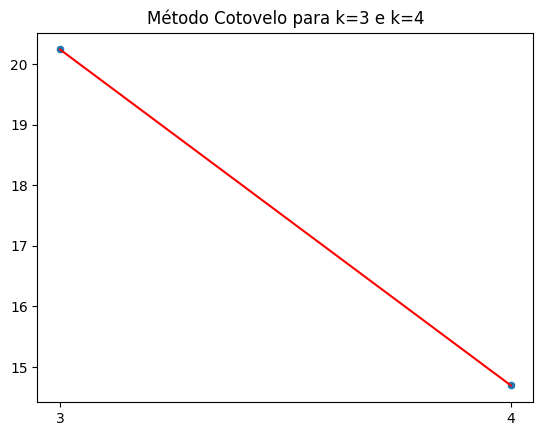

In [36]:
plt.title('Método Cotovelo para k=3 e k=4')
sns.scatterplot(x=clusters_inertias.keys(),y=clusters_inertias.values())
sns.lineplot(x=clusters_inertias.keys(),y=clusters_inertias.values(), color='red')
plt.xticks([3,4])
plt.show()

<h4>Analisando a inércia nos modelos de KMeans percebe-se um valor no modelo onde k vale 4, o que implica numa distancia menor dos pontos em relação aos centroides de cada cluster, ou seja, um modelo com 4 clusters é melhor para nosso dataset</h4>

<h1 style="text-align: center; font-weight: bold;">Redução de Dimensionalidade usando PCA</h1>

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

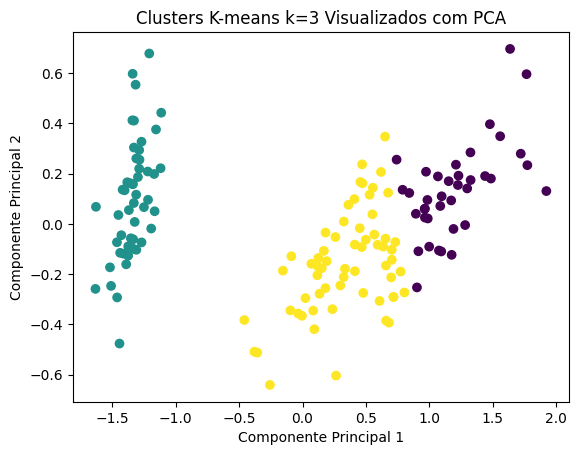

In [46]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_list[0], cmap='viridis')
plt.title('Clusters K-means k=3 Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

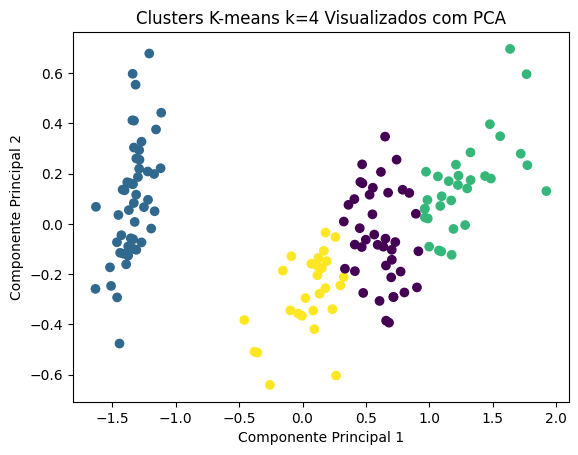

In [47]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_list[1], cmap='viridis')
plt.title('Clusters K-means k=4 Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

<h4>Ao validar os dois modelos de KMeans com 𝑘 = 3 e 𝑘 = 4, após redução de dimensionalidade com PCA, observamos que um cluster se destaca visualmente, com uma separação clara dos outros clusters. Nos dois modelos, os clusters restantes estão bem agrupados, com pouca sobreposição entre os pontos de cada cluster, o que indica que o algoritmo conseguiu separar bem as observações, com um bom nível de compactação dentro dos clusters.</h4>

<h1 style="text-align: center; font-weight: bold;">Redução de Dimensionalidade usando TSNE</h1>

In [51]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

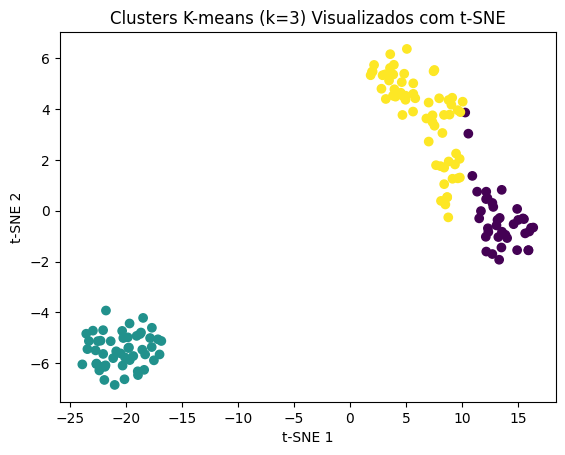

In [53]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans_list[0], cmap='viridis')
plt.title('Clusters K-means (k=3) Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

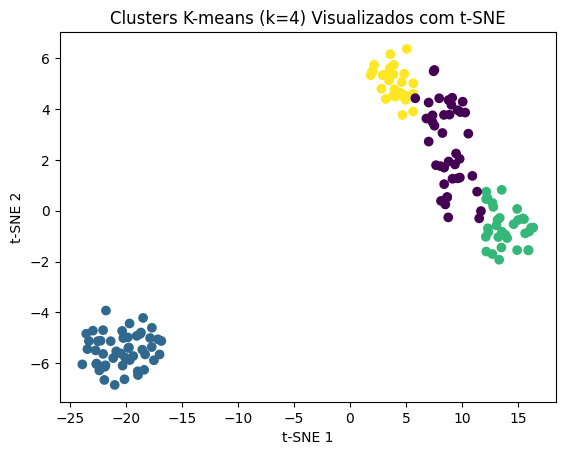

In [54]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans_list[1], cmap='viridis')
plt.title('Clusters K-means (k=4) Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

<h4>Ao aplicar a redução de dimensionalidade com t-SNE, observamos que a separação entre os clusters dos modelos KMeans com 𝑘 = 3 e 𝑘 = 4 se torna ainda mais evidente. Embora o PCA tenha mostrado uma boa separação, o t-SNE destacou de forma mais clara a estrutura dos agrupamentos, especialmente devido à sua capacidade de preservar distâncias locais. Em ambos os casos, um cluster se destaca visualmente, enquanto os outros permanecem bem agrupados e compactos. Isso reforça que o KMeans conseguiu capturar adequadamente a estrutura dos dados, com uma boa separação dos clusters, e o t-SNE apenas aprimorou a visualização dessa separação.</h4>

<h1 style="text-align: center; font-weight: bold">Análise dos resultados em comparação com os labels do dataset</h1>

In [60]:
df_results_kmens_3 = pd.DataFrame({
    'y': y,
    'y_predicted': labels_kmeans_list[0]
})

In [63]:
pd.crosstab(df_results_kmens_3['y'], df_results_kmens_3['y_predicted'], colnames=['y_predicted'], margins=True)

y_predicted,0,1,2,All
y,,,,
0,0,50,0,50
1,2,0,48,50
2,36,0,14,50
All,38,50,62,150


<h3>Ao avaliar o modelo KMeans com 𝑘 = 3, observamos que os agrupamentos feitos estão alinhados com os tipos de flores do nosso dataset. Todas as flores do tipo 0 foram agrupadas no cluster 1, 96% das flores do tipo 1 ficaram no cluster 2, e 72% das flores do tipo 2 foram agrupadas no cluster 0, indicando que o modelo conseguiu agrupar bem as flores do dataset.</h3>

In [64]:
df_results_kmens_4 = pd.DataFrame({
    'y': y,
    'y_predicted': labels_kmeans_list[1]
})

In [65]:
pd.crosstab(df_results_kmens_4['y'], df_results_kmens_4['y_predicted'], colnames=['y_predicted'], margins=True)

y_predicted,0,1,2,3,All
y,,,,,
0,0,50,0,0,50
1,24,0,0,26,50
2,17,0,32,1,50
All,41,50,32,27,150


<h3>Comparando com o modelo KMeans com 𝑘 = 3 (onde o agrupamento foi bem mais coeso, com 96% das flores do tipo 1 agrupadas no cluster 2, e 72% das flores do tipo 2 agrupadas no cluster 0), o modelo com 𝑘 = 4 apresentou uma distribuição mais fragmentada, principalmente para as flores do tipo 1, que foram divididas entre os clusters 0 e 3, e para o tipo 2, que teve uma alocação mais dispersa, embora o cluster 2 tenha sido predominante.
</h3>

<h3>
Em termos de qualidade de agrupamento, o modelo com 𝑘 = 3 parece ter obtido resultados mais precisos, especialmente para os tipos 1 e 2, enquanto o modelo com 𝑘 = 4 apresenta uma maior dispersão, indicando uma possível complexidade adicional sem ganho substancial na precisão dos agrupamentos.
</h3>

<h3>
Em resumo, o modelo com 𝑘 = 3 teve um desempenho mais eficaz e coeso, enquanto o modelo com 𝑘 = 4 resultou em uma distribuição mais dispersa, com menor precisão em alguns agrupamentos. O modelo com 𝑘 = 3 seria, portanto, a melhor escolha para esse conjunto de dados.</h3>

<h4></h4>